Problem 1.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(42)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

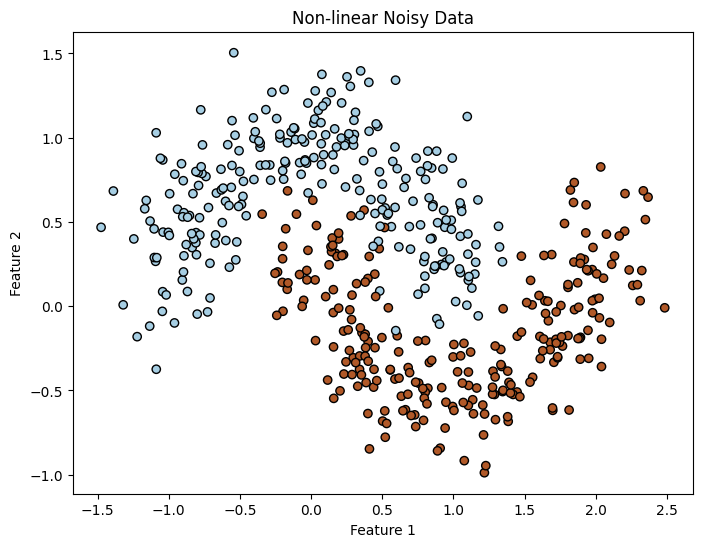

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Non-linear Noisy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [7]:
def plot_decision_boundary(model, title):
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

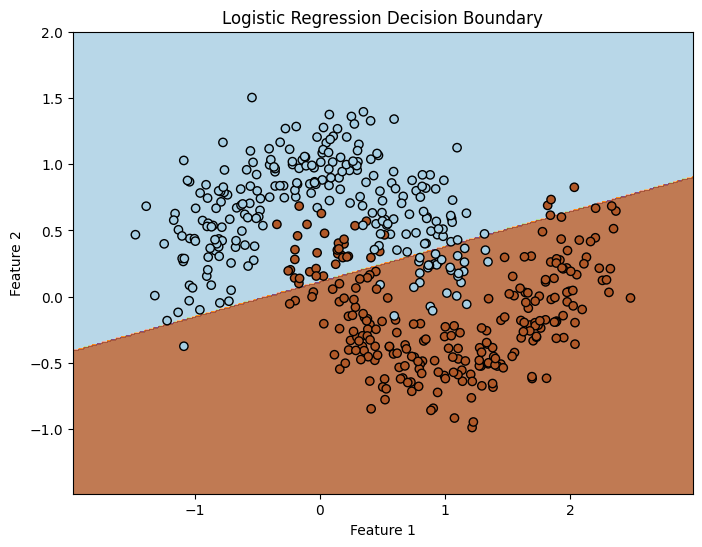

In [9]:
plot_decision_boundary(log_reg, "Logistic Regression Decision Boundary")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

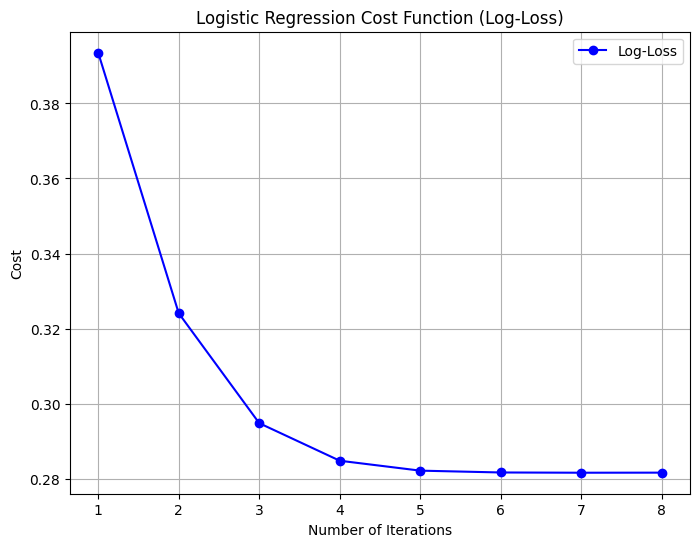

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Logistic Regression - Log-Loss Over Iterations
log_reg = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42, verbose=0)
log_reg.fit(X_train_scaled, y_train)

# Capture the cost (log-loss)
log_loss_values = []
for i in range(1, log_reg.n_iter_[0] + 1):
    temp_model = LogisticRegression(max_iter=i, solver='lbfgs', random_state=42, warm_start=True)
    temp_model.fit(X_train_scaled, y_train)
    probs = temp_model.predict_proba(X_train_scaled)
    cost = log_loss(y_train, probs)
    log_loss_values.append(cost)

# Plotting the Cost Function for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(log_loss_values) + 1), log_loss_values, marker='o', color='blue', label='Log-Loss')
plt.title("Logistic Regression Cost Function (Log-Loss)")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.legend()
plt.show()


In [11]:
svm_hard = SVC(C=1e10, kernel='rbf')
svm_hard.fit(X_train_scaled, y_train)

SVC(C=10000000000.0)

In [12]:
svm_soft = SVC(C=1, kernel='rbf')
svm_soft.fit(X_train_scaled, y_train)

SVC(C=1)

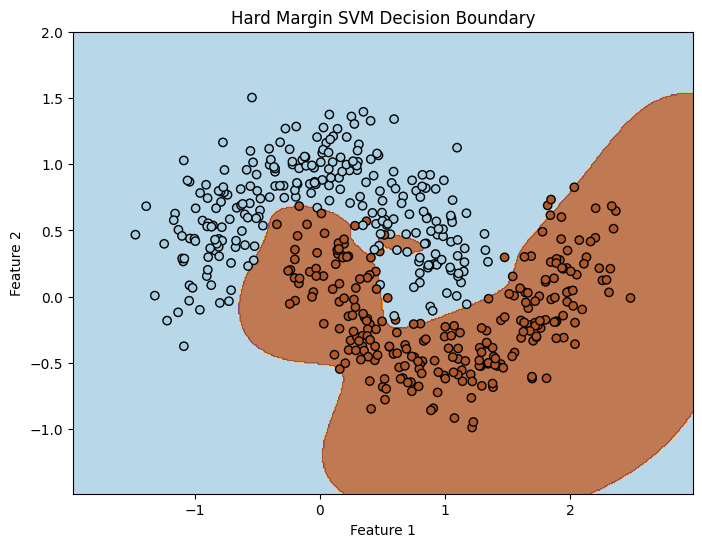

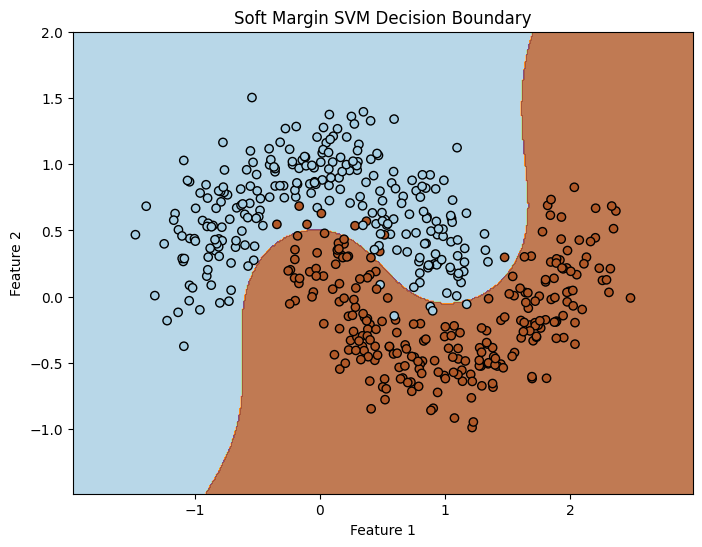

In [13]:
plot_decision_boundary(svm_hard, "Hard Margin SVM Decision Boundary")
plot_decision_boundary(svm_soft, "Soft Margin SVM Decision Boundary")

In [14]:
models = {"Logistic Regression": log_reg, "Hard Margin SVM": svm_hard, "Soft Margin SVM": svm_soft}
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

Logistic Regression - Train Accuracy: 0.86, Test Accuracy: 0.87
Hard Margin SVM - Train Accuracy: 0.98, Test Accuracy: 0.95
Soft Margin SVM - Train Accuracy: 0.97, Test Accuracy: 0.97


Problem 2.

In [16]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

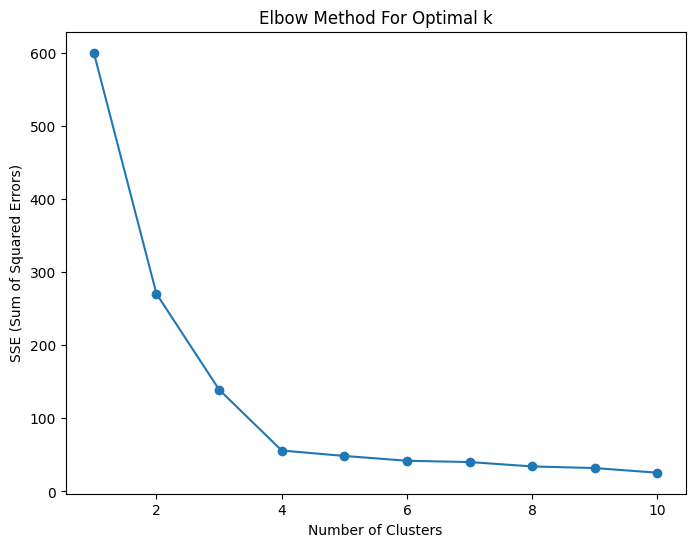

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

optimal k=4

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

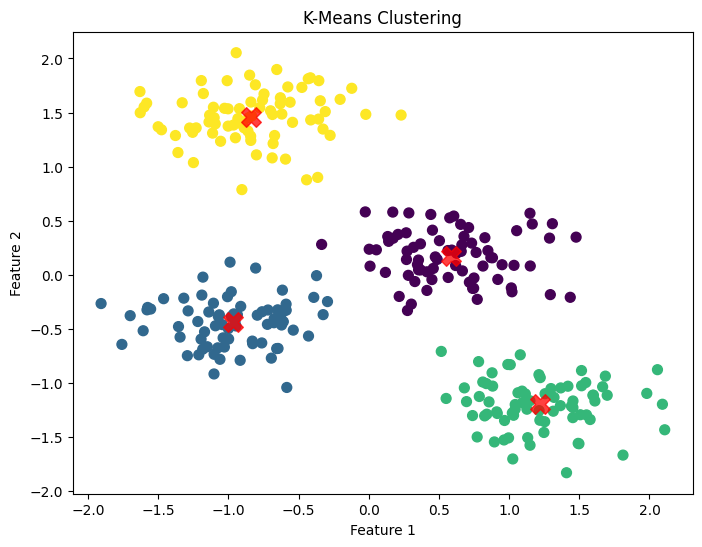

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Problem 3.

In [24]:
!pip install kmodes

In [25]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder

Let's say we have a dataset that has the information about hair color, eye color, and skin color of people. We want to group them based on that information.

In [26]:
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
print(data)

       hair_color eye_color skin_color
person                                
P1         blonde     amber       fair
P2       brunette      gray      brown
P3            red     green      brown
P4          black     hazel      brown
P5       brunette     amber       fair
P6          black      gray      brown
P7            red     green       fair
P8          black     hazel       fair


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 10.0
Run 2, iteration: 2/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clu

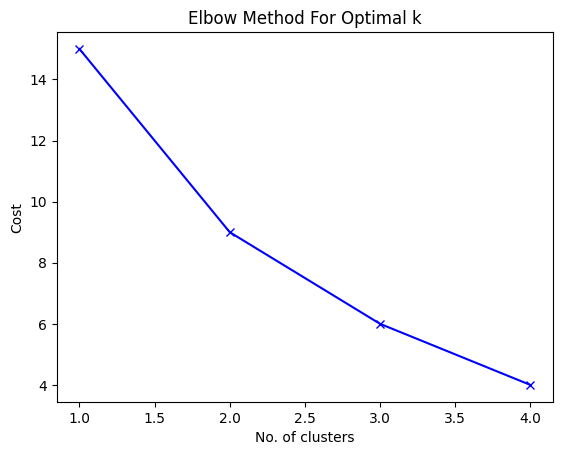

In [27]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 10.0
Run 2, iteration: 2/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 9.0
Run 5, iteration: 2/100, moves: 0, cost: 9.0
Best run was number 3


array([2, 1, 0, 0, 2, 0, 2, 0], dtype=uint16)

In [29]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,2,blonde,amber,fair
P2,1,brunette,gray,brown
P3,0,red,green,brown
P4,0,black,hazel,brown
P5,2,brunette,amber,fair
P6,0,black,gray,brown
P7,2,red,green,fair
P8,0,black,hazel,fair


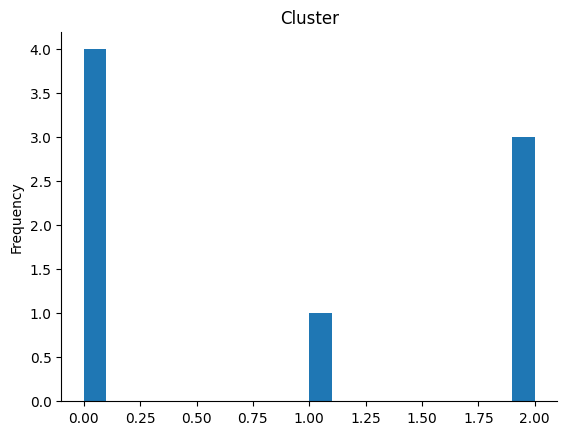

In [32]:
from matplotlib import pyplot as plt
data['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)